In [16]:
import xarray as xr
import numpy as np

In [5]:
tu = xr.open_dataset("/home/z5113258/Documents/data/REAN_HB/GODAS/GODAS_tauu.nc")

In [6]:
tv = xr.open_dataset("/home/z5113258/Documents/data/REAN_HB/GODAS/GODAS_tauv.nc")

In [50]:
#load in godas u/v velocities

In [51]:
u = xr.open_dataset("/home/z5113258/Documents/data/REAN_HB/GODAS/GODAS_ucur.nc").
v = xr.open_dataset("/home/z5113258/Documents/data/REAN_HB/GODAS/GODAS_vcur.nc")

In [54]:
u = u.ucur
v = v.vcur

In [19]:
tu  = tu.uflx

In [20]:
tv = tv.vflx

In [30]:
tu = tu.fillna(0)
tv = tv.fillna(0)

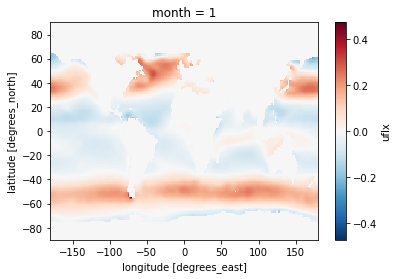

In [32]:
tu[0].plot()

In [33]:
#calculate f

In [123]:
def coriolis_param(lat):
    day = (24*60*60)-(4*60)# this is 23hrs 56mins
    om = (2*np.pi)/day
    f = 2*om*np.sin(np.deg2rad(lat))# * np.pi / 180)
    return f
def ekman(taux, tauy):
    rho = 1026#kgm^-3
    f = coriolis_param(taux.lat)
    dtydx = tauy.differentiate('lon') / (110e3 * np.cos(tauy.lat * np.pi / 180))
    dtxdy = taux.differentiate('lat') / (110e3)
    ek = (1/(rho*f))*(dtydx-dtxdy)
    return ek
#ekman layer depth formualr from stewrat oceanogrpahy text
def eld(uwnd, vwnd):
    U10 = np.sqrt((uwnd**2) + (vwnd**2))
    DE = ( 7.6 / np.sqrt( np.sin(abs(np.deg2rad(30)))))#* U10
    return DE
def eld2(ds):
    return np.sqrt(2* 2e-2/ abs(coriolis_param(ds.lat)))

In [127]:
def ek_u_v(tx, ty):
    rho = 1026#kgm^-3
    f = coriolis_param(tx.lat)
    h = eld2(tx)
    ve = -tx/(rho * h *f)
    ue = ty/(rho *h*f)
    return ve, ue

In [111]:
day = (24*60*60)-(4*60)# this is 23hrs 56mins
om = (2*np.pi)/day

In [124]:
el = eld2(tu)

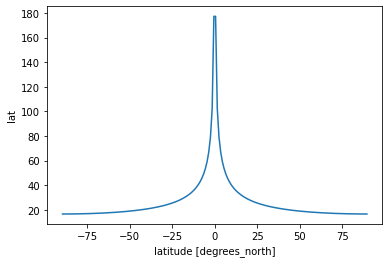

In [126]:
el.plot()

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([16.06098551, 16.16098551, 16.26098551, 16.36098551, 16.46098551,
        16.56098551, 16.66098551, 16.76098551, 16.86098551, 16.96098551,
        17.06098551]),
 <BarContainer object of 10 artists>)

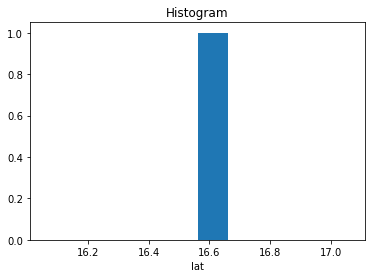

In [118]:
np.sqrt(2*2e-2/ abs(coriolis_param(tu.lat)))[0].plot()

In [103]:
import math

In [105]:
ed


10.748023074035522

In [128]:
ve, ue = ek_u_v(tu, tv)

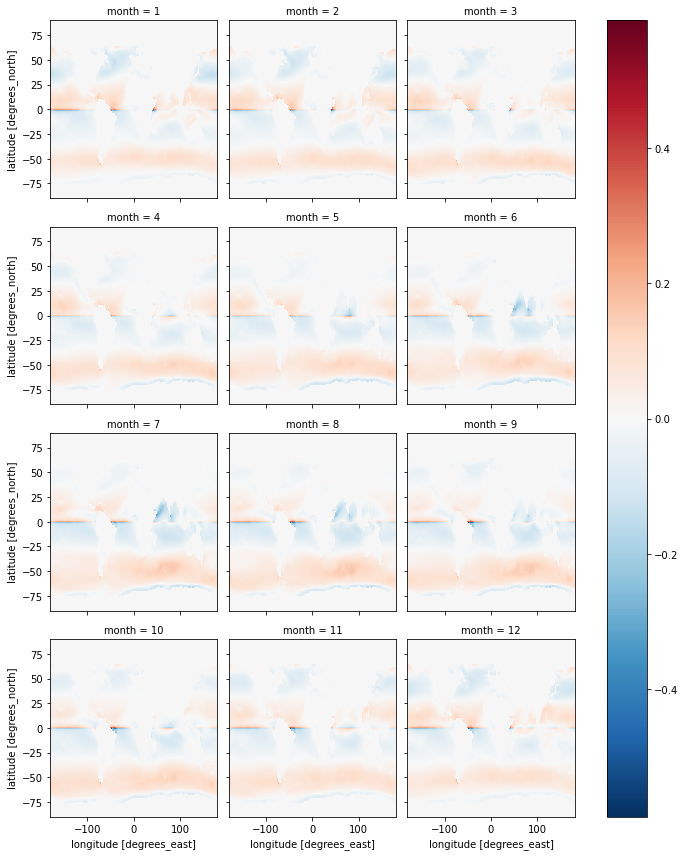

In [133]:
ve.plot(col = 'month', col_wrap = 3)

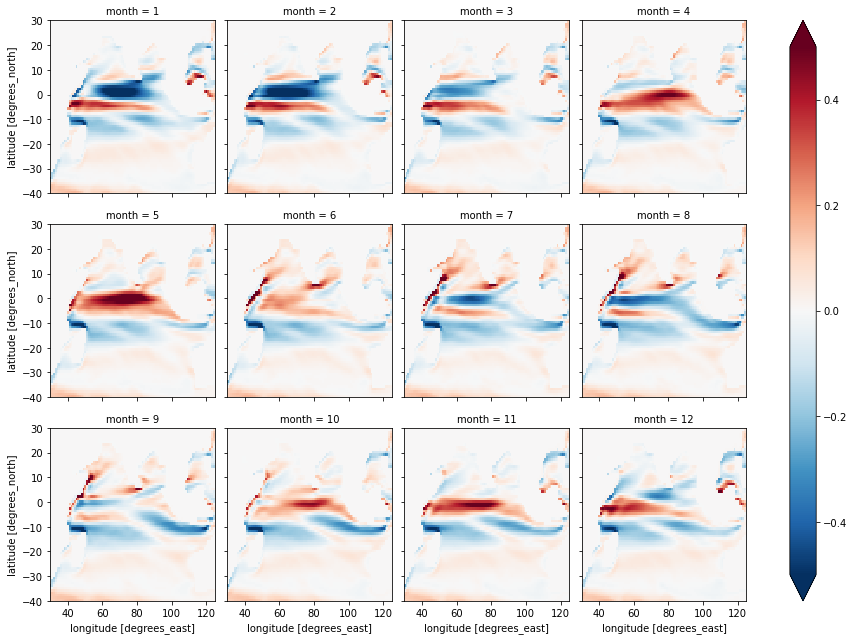

In [73]:
(u - ue).plot(col = 'month', col_wrap = 4, vmin = -0.5, vmax = 0.5, cmap = 'RdBu_r')

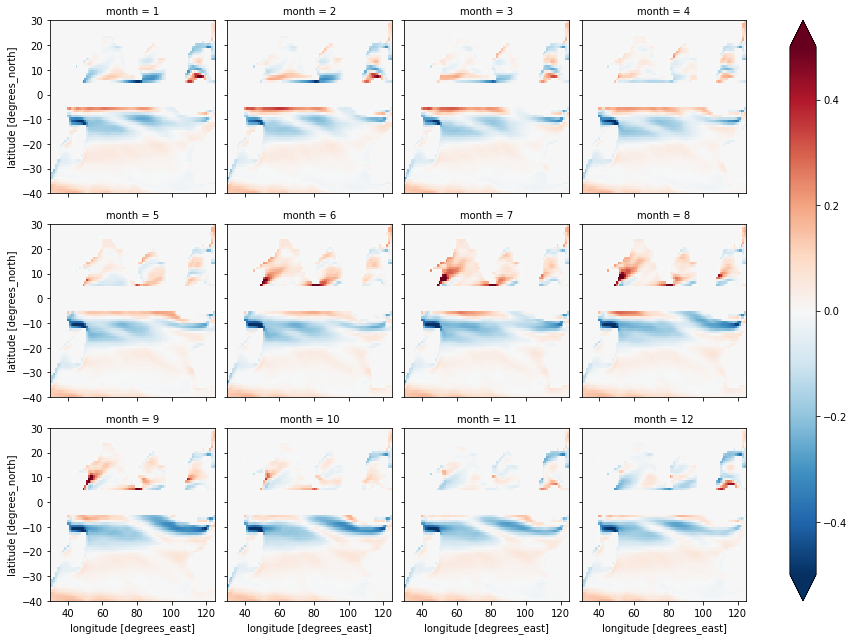

In [63]:
(u - ue).where(((u - ue).lat<-5)|((u - ue).lat>5), 0).plot(col = 'month', col_wrap = 4, vmin = -0.5, vmax = 0.5, cmap = 'RdBu_r')

In [37]:
ek_trans = np.sqrt(u**2 + v**2)

In [46]:
ek_trans = ek_trans.where((ek_trans.lat<-5)|(ek_trans.lat>5), 0)

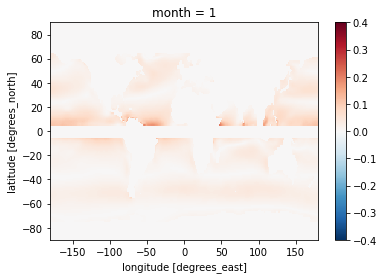

In [49]:
ek_trans[0].plot(vmin = -0.4, vmax = 0.4, cmap = 'RdBu_r')

In [39]:
ek = ekman(tu, tv)

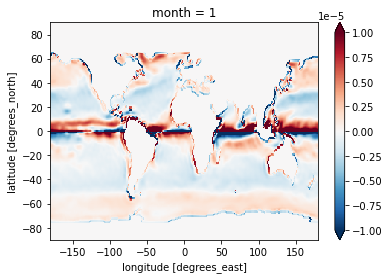

In [45]:
ek[:,0].plot(vmin = -1e-5)

In [134]:
u = xr.open_mfdataset("/home/z5113258/Documents/SODA3.4.2/u_7/soda3.4.2_mn_ocean_reg_*.nc")

In [136]:
u = u.u

In [139]:
u = u[:, 0:5]

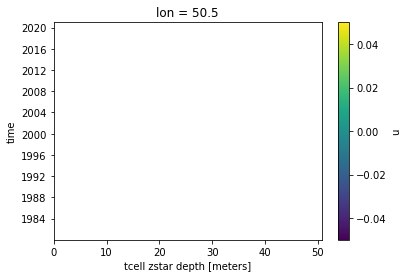

In [155]:
u.sel(lat = slice(-10, 10), lon = 50.5).integrate("lat", ).plot()

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


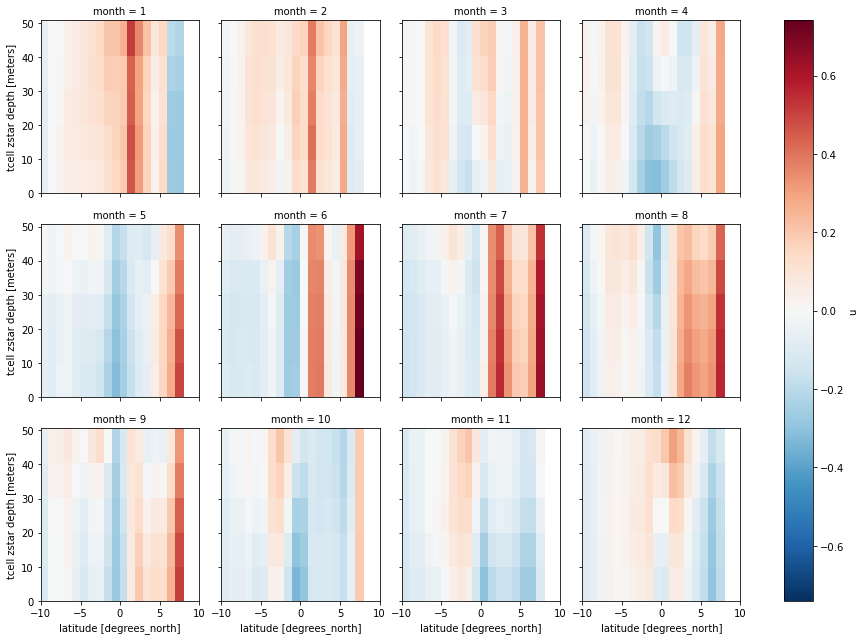

In [148]:
(u.sel(lat = slice(-10, 10), lon = 50.5).groupby('time.month').mean('time') -
     u.sel(lat = slice(-10, 10), lon = 70.5).groupby('time.month').mean('time')).plot(col = 'month', col_wrap = 4)
 


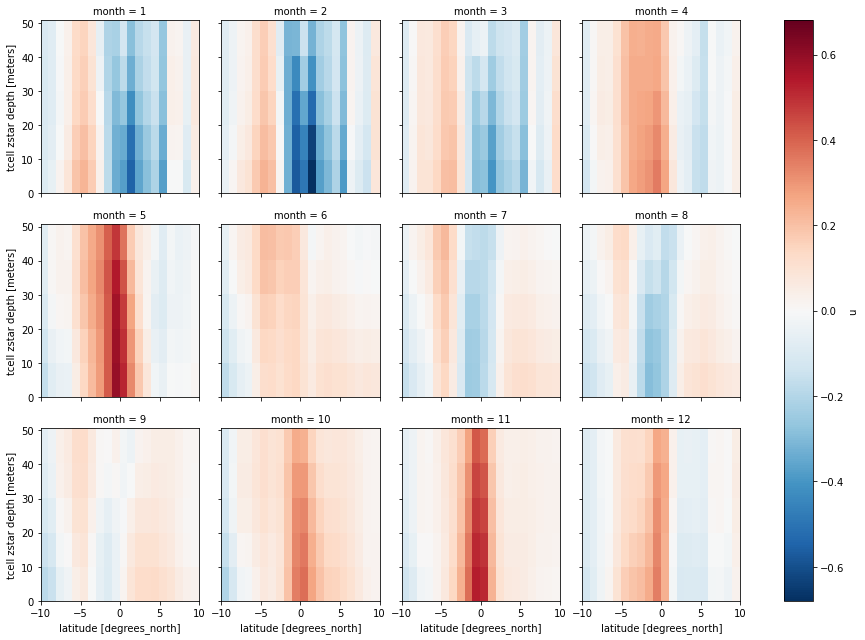

In [147]:
u.sel(lat = slice(-10, 10), lon = 70.5).groupby('time.month').mean('time').plot(col = 'month', col_wrap = 4)

In [161]:
u

,Array,Chunk
Bytes,637.63 MB,15.55 MB
Shape,"(492, 5, 180, 360)","(12, 5, 180, 360)"
Count,164 Tasks,41 Chunks
Type,float32,numpy.ndarray


In [160]:
# Extract the necessary variables
depth = u['st_ocean']  # Replace with the actual variable name in your dataset

# Define the region of interest
lat_range = slice(-10, 10)  # Latitude range from -10 to 10 degrees
lon_range = slice(50, 50)  # Longitude range at 50 degrees

# Extract the region of interest and the top 50 meters layer
u_roi = u.sel(lat=lat_range, lon=lon_range)
depth_roi = depth.sel(lat=lat_range, lon=lon_range)

depth_top_50m = 50  # Depth of interest in meters

# Calculate the area
cell_area = dataset['cell_area']  # Replace with the actual variable name in your dataset
area_roi = cell_area.sel(latitude=lat_range, longitude=lon_range)

# Integrate the area to obtain depth-integrated area for the top 50 meters
area_int = area_roi.sel(depth=slice(None, depth_top_50m)).sum(dim='depth')

# Multiply depth-integrated area by zonal current velocity to calculate volume transport
volume_transport = (area_int * u_roi).sum(dim=['latitude', 'longitude'])

# Print the total volume transport
print('Total volume transport (top 50 meters):', volume_transport.values.item(), 'm³/s')


ValueError: dimensions or multi-index levels ['lat', 'lon'] do not exist

In [163]:
import os

In [181]:
datadir = '/home/z5113258/Documents/data/CMIP6_HB_new/'
#dict with file names
varis = {'z20':'_z20.nc'}
TC_D={}
#get all data for temp tendency
for model in os.listdir(datadir):
    #go thorugh all varis
    if model in ['NESM3']:
        pass
    else:
        #input file
        inp_files = (os.path.join(datadir, model, str(model+"_z20.nc")))
        try:
            #load in file
            var = xr.open_dataarray(inp_files)
            #now append data to model dict
            TC_D[model] = var
        except Exception as e:
            print("Error. ", e)
            pass
#now get models timeseries
for i, model in enumerate(TC_D.keys()):
    try:    
        tc = TC_D[model]
        if tc.mean()>1000:
            tc = tc/10
        #now turn into an array
        if i == 0:
            TCM = tc
        else:
            TCM = xr.concat([TCM, tc], dim = 'model')
    except Exception as e:
            print("something went wrong, here is the error code", e)

Error.  [Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_z20.nc'


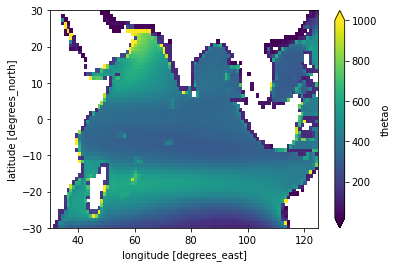

In [183]:
TCM.mean('model').mean('month').plot(vmin = 20, vmax = 1000)